In [9]:
#import the modules that I will require
import os
import numpy as np

import scipy
from scipy import signal

import control as ct
#from scipy.optimize import curve_fit

import pylab as pyl
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#Setup the main directories using the environ dir
#Define the various directories
script_dir = os.getcwd()

#using dirname you can go up of one directory
main_dir = os.path.dirname(script_dir)

#then use join to define variables pointing to subdirectories
data_dir = os.path.join(main_dir,"code")

#define an output directory with the results
results_dir = os.path.join(main_dir,"figure")

#if the directory does not exist create it
if not os.path.exists(results_dir):
    os.mkdir(results_dir)

In [11]:
#set the parameters
J = 0.01
b = 0.001
Kt = 1
Ke = 1
R = 10
L = 1

In [12]:
#define the transfer function
# H = Kt / s * ((J*s+b)*(L*s+R)+Ke*Kt)
# H = 100 / (s**3 + 10.1*s**2 + 101*s)

num = (0,0,0,100)
den = (1,10.1,101,0)

In [13]:
#compute zeros and poles and gain using scipy
a = scipy.signal.tf2zpk(num, den)
zeros = a[0]
poles = a[1]
gain = a[2]

print(f"Zeros: {zeros}")
print(f"Poles: {poles}")
print(f"gain: {gain}")

Zeros: []
Poles: [-5.05+8.68892974j -5.05-8.68892974j  0.  +0.j        ]
gain: 100.0


In [14]:
#define the transfer function
# H_thetaDot = Kt / ((J*s+b)*(L*s+R)+Ke*Kt)

# H_thetaDot(s) =  100 / (s**2+10.1*s+101)

num1 = (0,0,100)
den1 = (1,10.1,101)

In [15]:
#compute zeros and poles and gain using scipy
a1 = scipy.signal.tf2zpk(num1, den1)
zeros1 = a1[0]
poles1 = a1[1]
gain1 = a1[2]

print(f"Zeros: {zeros1}")
print(f"Poles: {poles1}")
print(f"gain: {gain1}")

Zeros: []
Poles: [-5.05+8.68892974j -5.05-8.68892974j]
gain: 100.0


In [16]:
#define Laplace variable
s = ct.TransferFunction.s
#define the transfer function
sys = 100 / (s**2+10.1*s+101)

#compute the step response for a unit-step command in v_a
t = np.linspace(0,5,1000) #define time vector
time, step_resp = ct.step_response(sys, T=t)

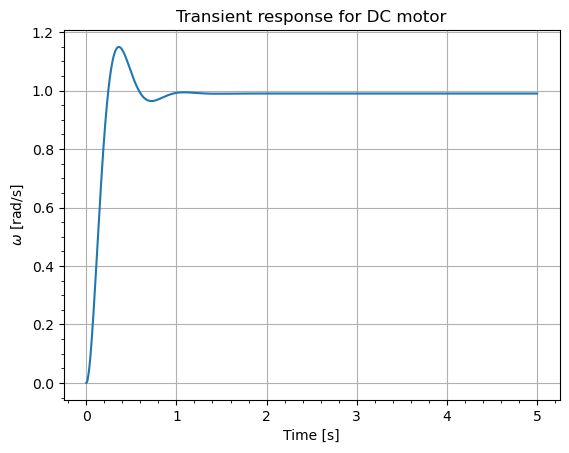

In [19]:
#plot the step response
plt.title('Transient response for DC motor')
plt.xlabel('Time [s]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid(True)
plt.minorticks_on()
plt.plot(time, step_resp, linestyle = '-',linewidth = 1.5, marker = '')

#save the plot in the results dir
out_name = os.path.join(results_dir,"StepResp.png")
plt.savefig(out_name)
plt.show()